In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, metrics, preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix

In [6]:
df = pd.read_csv('features.csv')
# display(df)
svm_train, svm_test = train_test_split(df, test_size=0.2)
X_svm_train, y_svm_train = svm_train.drop(columns=['Breed']), svm_train['Breed']
X_svm_test, y_svm_test = svm_test.drop(columns=['Breed']), svm_test['Breed']

clf = svm.SVC(kernel='rbf') # Linear Kernel
scaler = preprocessing.StandardScaler()
scaler.fit(X_svm_train)

Z_svm_train = scaler.transform(X_svm_train)
Z_svm_test = scaler.transform(X_svm_test)


clf.fit(Z_svm_train, y_svm_train)
y_pred = clf.predict(Z_svm_test)
print(classification_report(y_svm_test, y_pred))

                                precision    recall  f1-score   support

                 affenpinscher       0.92      0.79      0.85        29
                  afghan_hound       0.93      0.91      0.92        43
           african_hunting_dog       0.97      0.97      0.97        31
                      airedale       0.82      0.80      0.81        41
american_staffordshire_terrier       0.56      0.75      0.64        32
                   appenzeller       0.70      0.55      0.62        29
            australian_terrier       0.82      0.85      0.84        39
                       basenji       0.73      0.81      0.77        27
                        basset       0.85      0.85      0.85        41
                        beagle       0.74      0.76      0.75        38
            bedlington_terrier       0.93      0.90      0.92        30
          bernese_mountain_dog       0.82      0.93      0.88        45
              blenheim_spaniel       0.86      0.93      0.89  

In [7]:
# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernel type
}

In [8]:
# Load data
df = pd.read_csv('features.csv')

# Split data into train and test sets
svm_train, svm_test = train_test_split(df, test_size=0.2)
X_svm_train, y_svm_train = svm_train.drop(columns=['Breed']), svm_train['Breed']
X_svm_test, y_svm_test = svm_test.drop(columns=['Breed']), svm_test['Breed']

# Scale features
scaler = StandardScaler()
scaler.fit(X_svm_train)
Z_svm_train = scaler.transform(X_svm_train)
Z_svm_test = scaler.transform(X_svm_test)

# Define SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Z_svm_train, y_svm_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(Z_svm_test)
print("Classification Report:")
print(classification_report(y_svm_test, y_pred))


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.8084689900639253
Classification Report:
                                precision    recall  f1-score   support

                 affenpinscher       0.89      0.83      0.86        29
                  afghan_hound       0.98      1.00      0.99        57
           african_hunting_dog       0.88      0.88      0.88        34
                      airedale       0.95      0.90      0.92        39
american_staffordshire_terrier       0.53      0.63      0.58        30
                   appenzeller       0.70      0.42      0.53        33
            australian_terrier       0.67      0.81      0.73        36
                       basenji       0.86      0.81      0.83        37
                        basset       0.79      0.84      0.81        31
                        beagle       0.73      0.74      0.74        43
            bedlington_terrier       0.88      0.88      0.88        32
          bernese_mount

In [18]:
# Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
# Best Score: 0.8084689900639253

In [27]:
# Get classification report
multiclass_report = classification_report(y_svm_test, y_pred)
print("Multiclass Classification Report:")
print(multiclass_report)

# Get confusion matrix
conf_matrix = confusion_matrix(y_svm_test, y_pred)

Multiclass Classification Report:
                                precision    recall  f1-score   support

                 affenpinscher       0.89      0.83      0.86        29
                  afghan_hound       0.98      1.00      0.99        57
           african_hunting_dog       0.88      0.88      0.88        34
                      airedale       0.95      0.90      0.92        39
american_staffordshire_terrier       0.53      0.63      0.58        30
                   appenzeller       0.70      0.42      0.53        33
            australian_terrier       0.67      0.81      0.73        36
                       basenji       0.86      0.81      0.83        37
                        basset       0.79      0.84      0.81        31
                        beagle       0.73      0.74      0.74        43
            bedlington_terrier       0.88      0.88      0.88        32
          bernese_mountain_dog       0.87      0.96      0.91        47
              blenheim_spanie

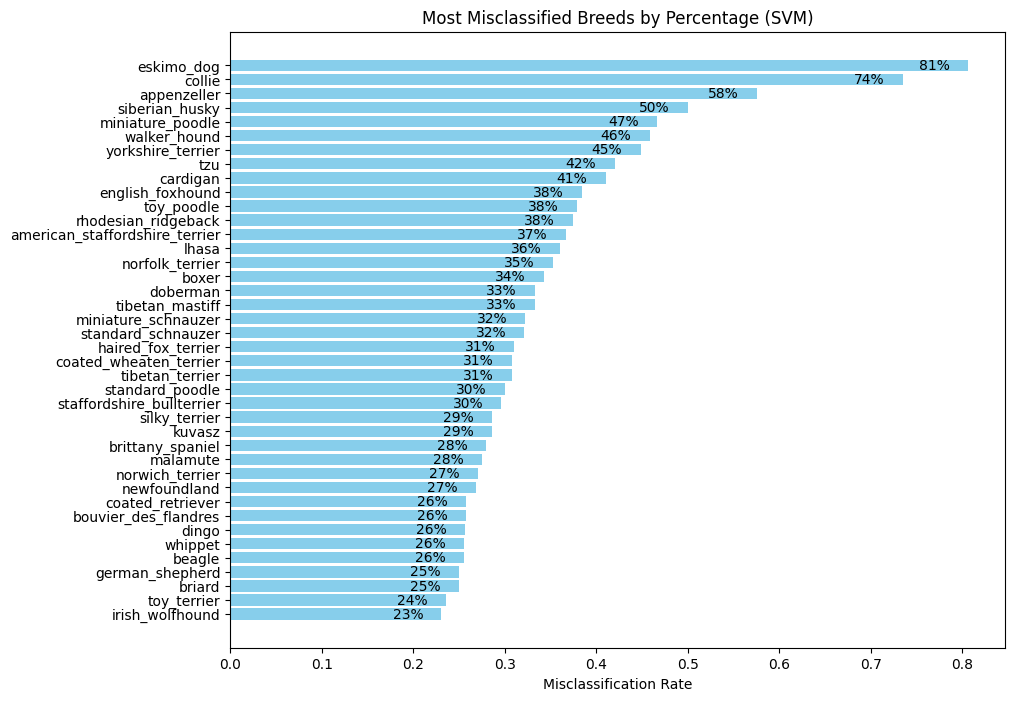

In [52]:
def plot_top_misclassified_breeds_percentage(y_true, y_pred, num_breeds=10):
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Compute the misclassification rate for each breed
    misclassified_rates = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    misclassified_rates = misclassified_rates / total_samples_per_breed

    # Get the unique breed labels
    unique_breeds = np.unique(np.concatenate([y_true, y_pred]))

    # Sort the breeds based on misclassification rates
    sorted_indices = np.argsort(misclassified_rates)[::-1]

    # Select the top misclassified breeds
    selected_breeds = unique_breeds[sorted_indices[:num_breeds]]
    selected_misclassification_rates = misclassified_rates[sorted_indices[:num_breeds]]

    # Plot the misclassification rates
    plt.figure(figsize=(10, 8))
    bars = plt.barh(selected_breeds, selected_misclassification_rates, color='skyblue')
    plt.xlabel('Misclassification Rate')
    plt.title('Most Misclassified Breeds by Percentage (SVM)')
    plt.gca().invert_yaxis()

    # Add text labels to the bars
    for bar, rate in zip(bars, selected_misclassification_rates):
        plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height()/2, f'{rate:.0%}', va='center', ha='right')

    plt.show()

plot_top_misclassified_breeds_percentage(y_svm_test, y_pred, num_breeds=40)


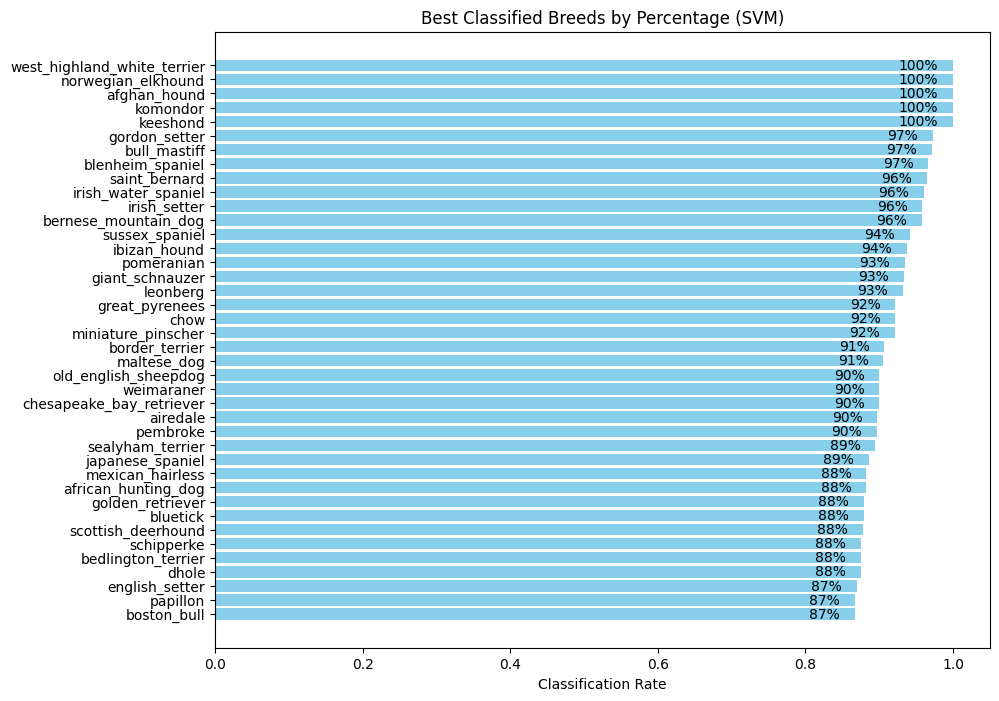

In [51]:
def plot_top_classified_breeds_percentage(y_true, y_pred, num_breeds=10):
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Compute the classification rate for each breed
    correct_predictions = np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    classification_rates = correct_predictions / total_samples_per_breed

    # Get the unique breed labels
    unique_breeds = np.unique(np.concatenate([y_true, y_pred]))

    # Sort the breeds based on classification rates
    sorted_indices = np.argsort(classification_rates)[::-1]

    # Select the top classified breeds
    selected_breeds = unique_breeds[sorted_indices[:num_breeds]]
    selected_classification_rates = classification_rates[sorted_indices[:num_breeds]]

    # Plot the classification rates
    plt.figure(figsize=(10, 8))
    bars = plt.barh(selected_breeds, selected_classification_rates, color='skyblue')
    plt.xlabel('Classification Rate')
    plt.title('Best Classified Breeds by Percentage (SVM)')
    plt.gca().invert_yaxis()

    # Add text labels to the bars
    for bar, rate in zip(bars, selected_classification_rates):
        plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height()/2, f'{rate:.0%}', va='center', ha='right')

    plt.show()

plot_top_classified_breeds_percentage(y_svm_test, y_pred, num_breeds=40)

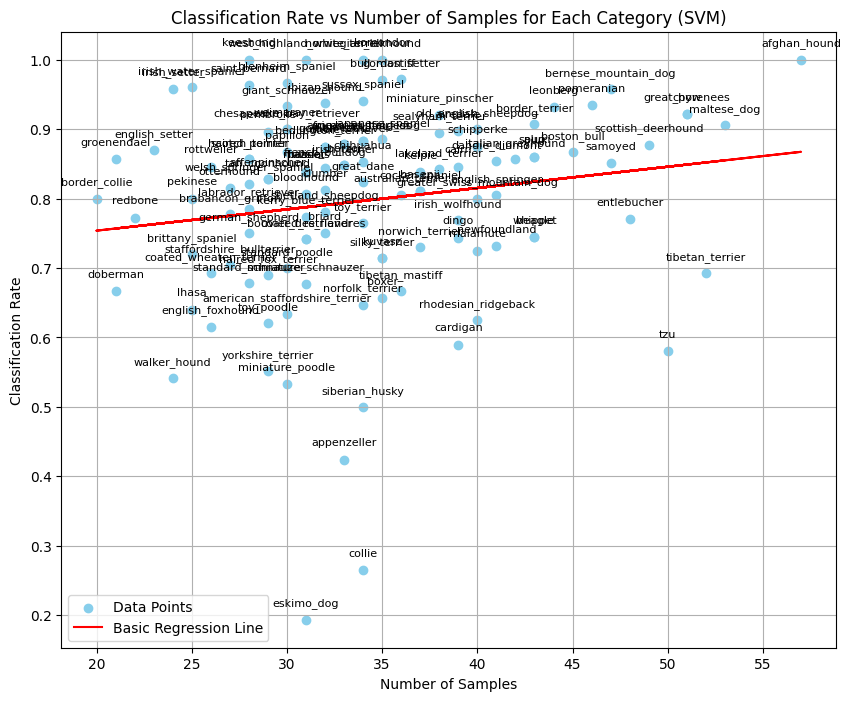

In [50]:
from sklearn.linear_model import LinearRegression

def compute_classification_rates(y_true, y_pred):
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Compute the classification rate for each breed
    correct_predictions = np.diag(conf_matrix)
    total_samples_per_breed = np.sum(conf_matrix, axis=1)
    classification_rates = correct_predictions / total_samples_per_breed

    # Get the unique breed labels
    unique_breeds = np.unique(np.concatenate([y_true, y_pred]))

    return unique_breeds, classification_rates, total_samples_per_breed

def plot_classification_rate_vs_samples(y_true, y_pred):
    breeds, classification_rates, total_samples = compute_classification_rates(y_true, y_pred)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(total_samples.reshape(-1, 1), classification_rates)

    # Plot the scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(total_samples, classification_rates, color='skyblue', label='Data Points')
    plt.xlabel('Number of Samples')
    plt.ylabel('Classification Rate')
    plt.title('Classification Rate vs Number of Samples for Each Category (SVM)')

    # Plot the regression line
    plt.plot(total_samples, model.predict(total_samples.reshape(-1, 1)), color='red', label='Basic Regression Line')

    # Annotate each point with the breed label
    for breed, samples, rate in zip(breeds, total_samples, classification_rates):
        plt.annotate(breed, (samples, rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

    plt.grid(True)
    plt.legend()
    plt.show()

plot_classification_rate_vs_samples(y_svm_test, y_pred)